## MATH 4388: Machine Learning Methods 


### Chapter 2: End-to-End Machine Learning Project

### Overview 

* Implementing the main steps of a machine learning project 
    * Get/prepare the data 
    * Explore the data (Exploratory Data Analysis or EDA) 
    * Prepare the data for machine learning algorithms
    * Select/fine-tune a model 


### Get the data
<hr style="border:2px solid gray">

* An excellent practice is to create a function for downloading data in a desired format instead of relying on manual steps

* Automating the process enables easy access to the latest data across multiple machines

* With "Path" in the next cell, you can perform tasks like
    * Checking if a path exists and if it is a file or directory
    * Creating new directories and files
    
* With the "tarfile" module, you can perform tasks like
    * Extracting files and directories from a tar archive

In [1]:
from pathlib import Path
import pandas as pd
import tarfile
import urllib.request

def load_housing_data():
    tarball_path = Path("datasets/housing.tgz")
    if not tarball_path.is_file():
        Path("datasets").mkdir(parents=True, exist_ok=True)
        url = "https://github.com/ageron/data/raw/main/housing.tgz"
        urllib.request.urlretrieve(url, tarball_path)
        with tarfile.open(tarball_path) as housing_tarball:
            housing_tarball.extractall(path="datasets")
    return pd.read_csv(Path("datasets/housing/housing.csv"))

In [2]:
housing = load_housing_data()

In [3]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
# Descriptive statistics
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


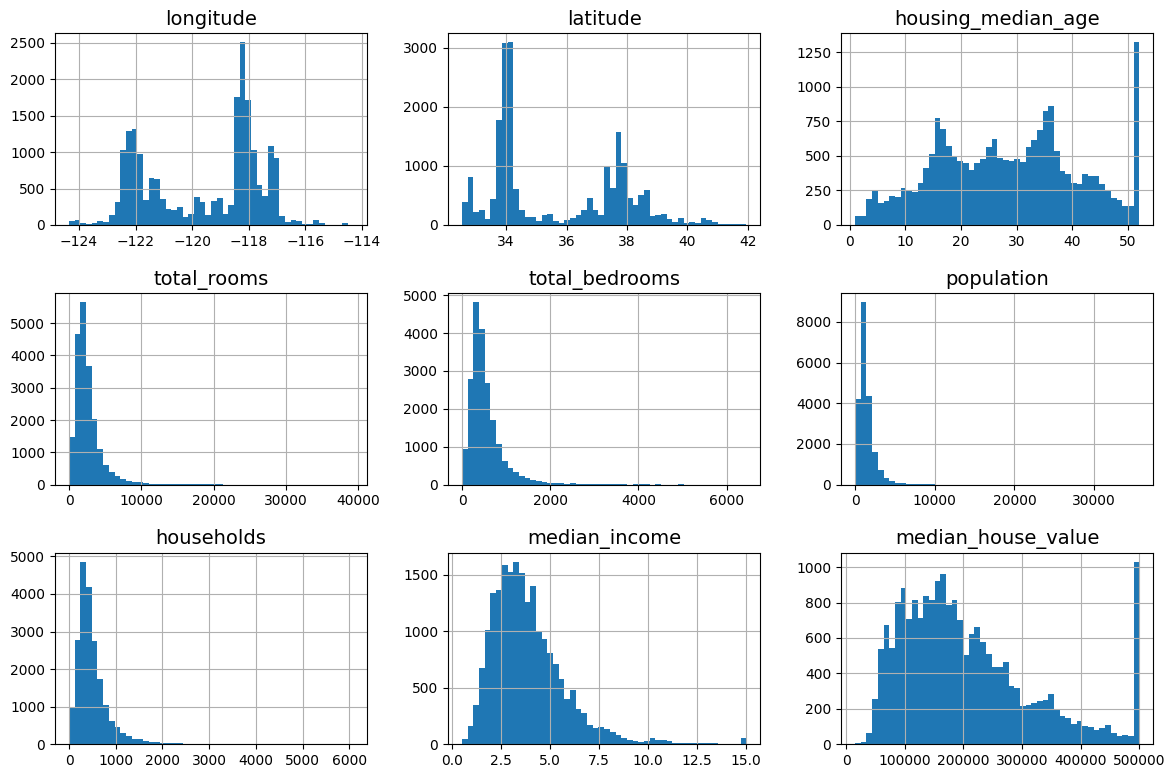

In [6]:
import matplotlib.pyplot as plt

# customization 
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

# histogram
housing.hist(bins=50, figsize=(12, 8))

plt.tight_layout()
plt.show()

In [7]:
# ocean_proximity is a categorical attribute

housing["ocean_proximity"].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

### Create a test set from scratch and using sklearn
<hr style="border:2px solid gray">

* Shuffle the samples to create a random ordering of the data

* Set the test ratio

* Divide the data into two sets 

* Or, split arrays or matrices into random train and test subsets using train_test_split() 

    * Documentation: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html


In [8]:
import numpy as np

def shuffle_and_split_data(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [9]:
train_set, test_set = shuffle_and_split_data(housing, 0.2)

print(len(train_set), len(test_set))

16512 4128


In [10]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

print(len(train_set), len(test_set))

16512 4128


### Stratified train-test split
<hr style="border:2px solid gray">

* In a stratified train-test split, the split is performed in such a way that the proportion of each class in the original data set is preserved in both subsets

* This helps prevent situations where one or more classes are underrepresented in either the training or testing set, which could lead to biased results during model evaluation

* Two main steps
    * Identify the target variable (class labels) that you want to predict
    * Determine the proportion of each class in the overall data set
    * Split the data set into training and testing sets while maintaining the same class distribution in both subsets
    


In [11]:
# create class labels

housing["income_cat"] = pd.cut(housing["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])

In [12]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,5
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,5
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,5
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,4
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,3


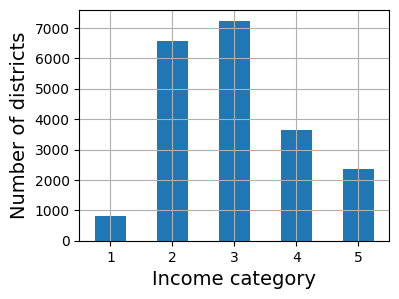

In [13]:
plt.rcParams.update({'font.size': 14, "figure.figsize": (4,3)})
housing["income_cat"].value_counts().sort_index().plot.bar(rot=0, grid=True)
plt.xlabel("Income category")
plt.ylabel("Number of districts")
plt.show()

In [14]:
strat_train_set, strat_test_set = train_test_split(
    housing, test_size=0.2, stratify=housing["income_cat"], random_state=42)

In [15]:
# test set distribution
strat_test_set["income_cat"].value_counts() / len(strat_test_set)


income_cat
3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: count, dtype: float64

In [16]:
# train set distribution
strat_train_set["income_cat"].value_counts() / len(strat_train_set)


income_cat
3    0.350594
2    0.318859
4    0.176296
5    0.114462
1    0.039789
Name: count, dtype: float64

In [17]:
# Original data distribution 
# Do we get the same distribution? 
housing["income_cat"].value_counts() / len(housing) 

income_cat
3    0.350581
2    0.318847
4    0.176308
5    0.114438
1    0.039826
Name: count, dtype: float64

In [18]:
# Since we should not use the new generated column "income_cat", we will drop this column 

for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

In [19]:
# Let us confirm this removal 

strat_train_set.head()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
13096,-122.42,37.80,52.0,3321.0,1115.0,1576.0,1034.0,2.0987,458300.0,NEAR BAY
14973,-118.38,34.14,40.0,1965.0,354.0,666.0,357.0,6.0876,483800.0,<1H OCEAN
3785,-121.98,38.36,33.0,1083.0,217.0,562.0,203.0,2.4330,101700.0,INLAND
14689,-117.11,33.75,17.0,4174.0,851.0,1845.0,780.0,2.2618,96100.0,INLAND
20507,-118.15,33.77,36.0,4366.0,1211.0,1912.0,1172.0,3.5292,361800.0,NEAR OCEAN


### Prepare the data for machine learning algorithms
<hr style="border:2px solid gray">

* Identify appropriate inputs and outputs for machine learning algorithms 
    * Input feature vector $\mathbf{x}\in\mathbb{R}^D$
    * Output $y\in\mathbb{R}$ (we mainly focus on single outputs)
* Most machine learning algorithms cannot handle missing values 
    * Remove the feature across all instances
    * Imputation: set the missing values to some value, e.g., the mean or median of available observations
    
* Most machine learning algorithms cannot handle text and categorical attributes
    * Convert them to numerical values 
    * For example, "ocean_proximity" in this data set 

In [20]:
# Identify appropriate inputs and outputs
housing = strat_train_set.drop("median_house_value", axis=1)

housing_labels = strat_train_set["median_house_value"].copy()

print(housing) # how many features do we have?

       longitude  latitude  housing_median_age  total_rooms  total_bedrooms   
13096    -122.42     37.80                52.0       3321.0          1115.0  \
14973    -118.38     34.14                40.0       1965.0           354.0   
3785     -121.98     38.36                33.0       1083.0           217.0   
14689    -117.11     33.75                17.0       4174.0           851.0   
20507    -118.15     33.77                36.0       4366.0          1211.0   
...          ...       ...                 ...          ...             ...   
14207    -118.40     33.86                41.0       2237.0           597.0   
13105    -119.31     36.32                23.0       2945.0           592.0   
19301    -117.06     32.59                13.0       3920.0           775.0   
19121    -118.40     34.06                37.0       3781.0           873.0   
19888    -122.41     37.66                44.0        431.0           195.0   

       population  households  median_income ocean_

In [21]:
print(housing_labels)

13096    458300.0
14973    483800.0
3785     101700.0
14689     96100.0
20507    361800.0
           ...   
14207    500001.0
13105     88800.0
19301    148800.0
19121    500001.0
19888    233300.0
Name: median_house_value, Length: 16512, dtype: float64


In [22]:
# How can we figure out if we have missing values for each feature? 

housing.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        168
population              0
households              0
median_income           0
ocean_proximity         0
dtype: int64

In [23]:
# We can find rows with missing values 

null_rows_idx = housing.isnull().any(axis=1)

housing.loc[null_rows_idx].head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
14452,-120.67,40.50,15.0,5343.0,NaN,2503.0,902.0,3.5962,INLAND
18217,-117.96,34.03,35.0,2093.0,NaN,1755.0,403.0,3.4115,<1H OCEAN
11889,-118.05,34.04,33.0,1348.0,NaN,1098.0,257.0,4.2917,<1H OCEAN
20325,-118.88,34.17,15.0,4260.0,NaN,1701.0,669.0,5.1033,<1H OCEAN
14360,-117.87,33.62,8.0,1266.0,NaN,375.0,183.0,9.8020,<1H OCEAN


In [24]:
# Imputation using sklearn 

from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")

housing_num = housing.select_dtypes(include=[np.number]) # remove the categorical column 

imputer.fit(housing_num)

X = imputer.transform(housing_num)

print(type(X))

<class 'numpy.ndarray'>


In [25]:
# Convert X from numpy array to dataframe 

housing_tr = pd.DataFrame(X, columns=housing_num.columns,
                          index=housing_num.index)

housing_tr.loc[null_rows_idx].head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
14452,-120.67,40.50,15.0,5343.0,434.0,2503.0,902.0,3.5962
18217,-117.96,34.03,35.0,2093.0,434.0,1755.0,403.0,3.4115
11889,-118.05,34.04,33.0,1348.0,434.0,1098.0,257.0,4.2917
20325,-118.88,34.17,15.0,4260.0,434.0,1701.0,669.0,5.1033
14360,-117.87,33.62,8.0,1266.0,434.0,375.0,183.0,9.8020


* In scikit-learn, the OrdinalEncoder is a preprocessing tool used to convert categorical variables with ordinal relationships into numerical representations. Ordinal data is a type of categorical data where the categories have a natural order or ranking.

* One-hot encoding is another common technique used in data preprocessing to convert categorical variables into a binary vector representation.  For each unique category in the categorical variable, a binary vector of 0s and 1s is created. The length of this vector is equal to the number of unique categories. Each element of the vector corresponds to a category, and only one element is set to 1 to indicate the presence of that category.

In [26]:
# Handling the categorical input feature

housing_cat = housing[["ocean_proximity"]]
housing_cat.head(8)

,ocean_proximity
13096,NEAR BAY
14973,<1H OCEAN
3785,INLAND
14689,INLAND
20507,NEAR OCEAN
1286,INLAND
18078,<1H OCEAN
4396,NEAR BAY


In [27]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()

housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)

housing_cat_encoded[:8]


array([[3.],
       [0.],
       [1.],
       [1.],
       [4.],
       [1.],
       [0.],
       [3.]])

In [28]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [29]:
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder(sparse_output=False)

housing_cat_1hot = cat_encoder.fit_transform(housing_cat)

housing_cat_1hot[:8]


array([[0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

### Feature scaling and transformation 
<hr style="border:2px solid gray">

* The performance of machine learning algorithms can be greatly affected when the input numerical attributes have very different scales
* This issue is known as "feature scaling" and there are some ways to improve the performance when dealing with such scenarios
    * Normalization (Min-Max scaling): Normalization scales the features to a range between min and max
    * Standardization (Z-score normalization): Standardizing the features involves transforming them so that they have a mean of 0 and a standard deviation of 1
        + Unlike Min-Max scaling, standardization does not restrict values to a specific range
    * Log Transformation: If the data has a skewed distribution, applying a log transformation can help normalize the feature and reduce the impact of extreme values

In [30]:
# MinMax 

from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler(feature_range=(-1, 1))

housing_num_min_max_scaled = min_max_scaler.fit_transform(housing_num)

In [31]:
# Standardization

from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()

housing_num_std_scaled = std_scaler.fit_transform(housing_num)

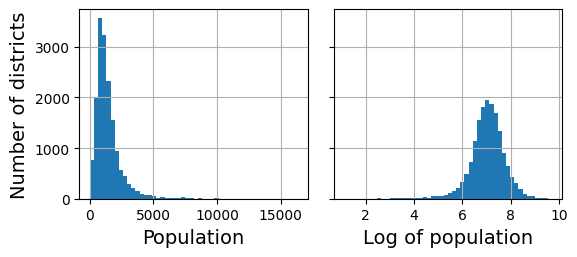

In [32]:
# Log Transformation

fig, axs = plt.subplots(1, 2, figsize=(6, 2.8), sharey=True)
housing["population"].hist(ax=axs[0], bins=50)
housing["population"].apply(np.log).hist(ax=axs[1], bins=50)
axs[0].set_xlabel("Population")
axs[1].set_xlabel("Log of population")
axs[0].set_ylabel("Number of districts")
plt.tight_layout()
plt.show()

In [33]:
# Moreover, we can transform the output variable or label 

from sklearn.linear_model import LinearRegression

target_scaler = StandardScaler()
scaled_labels = target_scaler.fit_transform(housing_labels.to_frame())

model = LinearRegression()
model.fit(housing[["median_income"]], scaled_labels)
some_new_data = housing[["median_income"]].iloc[:5]  # pretend this is new data

scaled_predictions = model.predict(some_new_data)
predictions = target_scaler.inverse_transform(scaled_predictions) # inverse transform 

print(predictions)

[[131997.15275877]
 [299359.35844434]
 [146023.37185694]
 [138840.33653057]
 [192016.61557639]]


### Transformation Pipelines
<hr style="border:2px solid gray">

* In scikit-learn, a Transformation Pipeline is a powerful tool for combining various preprocessing techniques, such as feature scaling, one-hot encoding, data imputation, and more, into a coherent sequence that can be applied to your data efficiently and consistently

* Scikit-Learn provides the Pipeline class to design and implement such sequences of transformations
    * It takes a list of tuples, where each tuple contains a name for the transformer and the corresponding transformer object

    * The last step of the pipeline typically involves a predictor, which is the machine learning model you want to train on the preprocessed data

In [34]:
from sklearn.pipeline import Pipeline

num_pipeline = Pipeline([
    ("impute", SimpleImputer(strategy="median")), # fill in missing values
    ("standardize", StandardScaler()), # standardization
])

In [35]:
housing_num_prepared = num_pipeline.fit_transform(housing_num)

housing_num_prepared[:2].round(2)

array([[-1.42,  1.01,  1.86,  0.31,  1.37,  0.14,  1.39, -0.94],
       [ 0.6 , -0.7 ,  0.91, -0.31, -0.44, -0.69, -0.37,  1.17]])

In [36]:
num_pipeline.steps


[('impute', SimpleImputer(strategy='median')),
 ('standardize', StandardScaler())]

In [37]:
num_pipeline[0]

SimpleImputer(strategy='median')

In [38]:
num_pipeline[1]

StandardScaler()

* In scikit-learn, ColumnTransformer is a preprocessing tool used to apply different data transformations to different columns or subsets of columns in a data set

* It is particularly useful when dealing with data sets that contain a mix of numerical and categorical features 

* The ColumnTransformer allows you to define which transformation should be applied to specific columns

In [40]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline

num_attribs = ["longitude", "latitude", "housing_median_age", "total_rooms",
               "total_bedrooms", "population", "households", "median_income"]
cat_attribs = ["ocean_proximity"]

cat_pipeline = make_pipeline(
    SimpleImputer(strategy="most_frequent"),
    OneHotEncoder(handle_unknown="ignore"))

preprocessing = ColumnTransformer([   # list of tuples 
    ("num", num_pipeline, num_attribs),
    ("cat", cat_pipeline, cat_attribs),
])


In [41]:
housing_prepared = preprocessing.fit_transform(housing)

# convert to dataframe
housing_prepared_fr = pd.DataFrame(
    housing_prepared,
    columns=preprocessing.get_feature_names_out(),
    index=housing.index)

housing_prepared_fr.head(3)

,num__longitude,num__latitude,num__housing_median_age,num__total_rooms,num__total_bedrooms,num__population,num__households,num__median_income,cat__ocean_proximity_<1H OCEAN,cat__ocean_proximity_INLAND,cat__ocean_proximity_ISLAND,cat__ocean_proximity_NEAR BAY,cat__ocean_proximity_NEAR OCEAN
13096,-1.423037,1.013606,1.861119,0.311912,1.368167,0.137460,1.394812,-0.936491,0.0,0.0,0.0,1.0,0.0
14973,0.596394,-0.702103,0.907630,-0.308620,-0.435925,-0.693771,-0.373485,1.171942,1.0,0.0,0.0,0.0,0.0
3785,-1.203098,1.276119,0.351428,-0.712240,-0.760709,-0.788768,-0.775727,-0.759789,0.0,1.0,0.0,0.0,0.0


### Select/fine-tune a model 
<hr style="border:2px solid gray">

* A predictor is equipped with a fit() method to train the model on a data set and a predict() method to make predictions on a different data set

In [42]:
from sklearn.linear_model import LinearRegression

lin_reg = make_pipeline(preprocessing, LinearRegression()) # new pipeline with the predictor 

lin_reg.fit(housing, housing_labels)


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardize',
                                                                   StandardScaler())]),
                                                  ['longitude', 'latitude',
                                                   'housing_median_age',
                                                   'total_rooms',
                                                   'total_bedrooms',
                                                   'population', 'households',
                                                   'median_income']),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['ocean_proximity'])])),
                ('linearregression', LinearRegression())])

In [43]:
housing_predictions = lin_reg.predict(housing)

housing_predictions[:5].round(-2)  # -2 = rounded to the nearest hundred

array([270900., 334800., 119900., 109200., 305600.])

In [44]:
# we can find the error rates using the ground-truth outputs in housing_labels

error_ratios = housing_predictions[:5].round(-2) / housing_labels.iloc[:5].values - 1

print(", ".join([f"{100 * ratio:.1f}%" for ratio in error_ratios]))

-40.9%, -30.8%, 17.9%, 13.6%, -15.5%


In [45]:
# use sklearn evaluation metrics 

# https://scikit-learn.org/stable/modules/model_evaluation.html

from sklearn.metrics import mean_squared_error

lin_rmse = mean_squared_error(housing_labels, housing_predictions,
                              squared=False)

print(lin_rmse)


68232.83515124217


### Cross-Validation (CV)
<hr style="border:2px solid gray">

* The main idea behind cross-validation is to use different subsets of the data for training and testing the model

* By repeating the training and testing process on different subsets, cross-validation provides an accurate estimate of the model's generalization performance

* Main steps 
    * The data set is divided into K subsets called folds
    * The model is trained on K-1 folds (training set) and tested on the remaining 1 fold (testing set)
    * In scikit-learn, you can use the cross_val_score function along with the appropriate scoring metric to perform cross-validation
    * Note that cross_val_score requires a utility function (greater is better) rather than a cost function (lower is better)
        + Thus, we will use "neg_root_mean_squared_error" in the next cell

<img src='cv.png' width=500 height=600 align=center>

In [46]:
# We use Decision Tree instead of Linear Regression in this cell 

from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score

tree_reg = make_pipeline(preprocessing, DecisionTreeRegressor(random_state=42))

# cross_val_score: estimator, inputs, outputs
tree_rmses = -cross_val_score(tree_reg, housing, housing_labels,
                              scoring="neg_root_mean_squared_error", cv=10) # cv is the number of folds

pd.Series(tree_rmses).describe()


count       10.000000
mean     68778.541172
std       1606.882060
min      66941.100114
25%      67347.392808
50%      68653.791710
75%      69967.922873
max      71446.436634
dtype: float64

### Model selection and hyperparameter tuning
<hr style="border:2px solid gray">

* Hyperparameters are configuration settings that are not learned from the data during training and must be set before training the model

* Scikit-learn is capable of finding the best combination of hyperparameters for a machine learning model

* We should specify a grid of hyperparameter values for each hyperparameter of the model
    * GridSearchCV: exhaustively searches all possible combinations of specified hyperparameter values 
        + The key advantage of GridSearchCV is that it explores all possible hyperparameter combinations
        + However, it can be computationally expensive, especially when the hyperparameter search space is large
    * RandomizedSearchCV: randomly samples a fixed number of hyperparameter combinations from the specified search space
        + It provides a balance between exploring a wide range of hyperparameters and being computationally efficient

In [47]:
from sklearn.model_selection import GridSearchCV

full_pipeline = Pipeline([
    ("preprocessing", preprocessing),
    ("decision_tree", DecisionTreeRegressor(random_state=42)),
])
param_grid = {'decision_tree__max_depth': [None, 1, 2, 4, 6],
     'decision_tree__min_samples_split': [4, 6, 8],
     'decision_tree__max_features': [6, 7, 8]}

grid_search = GridSearchCV(full_pipeline, param_grid, cv=3,
                           scoring='neg_root_mean_squared_error')

grid_search.fit(housing, housing_labels)


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('impute',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('standardize',
                                                                                          StandardScaler())]),
                                                                         ['longitude',
                                                                          'latitude',
                                                                          'housing_median_age',
                                                                          'total_rooms',
                                                                          'total_bedrooms',
                                                                          'population',
                                                                          'households',
                                                                          'median_income']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('simpleimpu...
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('onehotencoder',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['ocean_proximity'])])),
                                       ('decision_tree',
                                        DecisionTreeRegressor(random_state=42))]),
             param_grid={'decision_tree__max_depth': [None, 1, 2, 4, 6],
                         'decision_tree__max_features': [6, 7, 8],
                         'decision_tree__min_samples_split': [4, 6, 8]},
             scoring='neg_root_mean_squared_error')

In [48]:
# best parameters 

grid_search.best_params_

{'decision_tree__max_depth': None,
 'decision_tree__max_features': 7,
 'decision_tree__min_samples_split': 8}

In [49]:
# best estimator 

grid_search.best_estimator_


Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('standardize',
                                                                   StandardScaler())]),
                                                  ['longitude', 'latitude',
                                                   'housing_median_age',
                                                   'total_rooms',
                                                   'total_bedrooms',
                                                   'population', 'households',
                                                   'median_income']),
                                                 ('cat',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['ocean_proximity'])])),
                ('decision_tree',
                 DecisionTreeRegressor(max_features=7, min_samples_split=8,
                                       random_state=42))])

In [50]:
# full information about the grid search 

cv_res = pd.DataFrame(grid_search.cv_results_)

cv_res.sort_values(by="mean_test_score", ascending=False, inplace=True)

cv_res.head()


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_decision_tree__max_depth,param_decision_tree__max_features,param_decision_tree__min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
5,0.040437,0.000217,0.002571,0.000047,None,7,8,"{'decision_tree__max_depth': None, 'decision_t...",-66654.677149,-66954.983293,-65006.488870,-66205.383104,856.565422,1
2,0.037213,0.000243,0.002579,0.000058,None,6,8,"{'decision_tree__max_depth': None, 'decision_t...",-66846.855551,-68258.438984,-65931.745040,-67012.346525,957.049850,2
1,0.037114,0.000397,0.002616,0.000026,None,6,6,"{'decision_tree__max_depth': None, 'decision_t...",-66688.210346,-68252.863858,-67309.400791,-67416.824998,643.267763,3
4,0.040967,0.000295,0.002647,0.000017,None,7,6,"{'decision_tree__max_depth': None, 'decision_t...",-67356.390530,-67800.548882,-67878.891080,-67678.610164,230.077515,4
8,0.044879,0.000957,0.002818,0.000024,None,8,8,"{'decision_tree__max_depth': None, 'decision_t...",-68290.825702,-68670.537465,-66906.072755,-67955.811974,758.291754,5


In [51]:
from sklearn.model_selection import RandomizedSearchCV


# n_iter: Number of hyperparameter settings that are sampled
# n_iter: trades off runtime vs quality of the solution

rnd_search = RandomizedSearchCV(
    full_pipeline, param_grid, n_iter=5, cv=3,
    scoring='neg_root_mean_squared_error')

rnd_search.fit(housing, housing_labels)

RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(transformers=[('num',
                                                                               Pipeline(steps=[('impute',
                                                                                                SimpleImputer(strategy='median')),
                                                                                               ('standardize',
                                                                                                StandardScaler())]),
                                                                               ['longitude',
                                                                                'latitude',
                                                                                'housing_median_age',
                                                                                'total_rooms',
                                                                                'total_bedrooms',
                                                                                'population',
                                                                                'households',
                                                                                'median_income']),
                                                                              ('cat',
                                                                               Pipeline(steps=[('simp...
                                                                                                SimpleImputer(strategy='most_frequent')),
                                                                                               ('onehotencoder',
                                                                                                OneHotEncoder(handle_unknown='ignore'))]),
                                                                               ['ocean_proximity'])])),
                                             ('decision_tree',
                                              DecisionTreeRegressor(random_state=42))]),
                   n_iter=5,
                   param_distributions={'decision_tree__max_depth': [None, 1, 2,
                                                                     4, 6],
                                        'decision_tree__max_features': [6, 7,
                                                                        8],
                                        'decision_tree__min_samples_split': [4,
                                                                             6,
                                                                             8]},
                   scoring='neg_root_mean_squared_error')

In [52]:
cv_res = pd.DataFrame(rnd_search.cv_results_)

cv_res.sort_values(by="mean_test_score", ascending=False, inplace=True)

cv_res # we only have 5 combinations/rows 

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_decision_tree__min_samples_split,param_decision_tree__max_features,param_decision_tree__max_depth,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
1,0.023862,0.000113,0.002171,0.000016,8,7,6,"{'decision_tree__min_samples_split': 8, 'decis...",-68561.180888,-68422.961211,-68854.951682,-68613.031260,180.130115,1
4,0.046345,0.000550,0.002667,0.000039,4,8,None,"{'decision_tree__min_samples_split': 4, 'decis...",-71771.578503,-68676.124946,-72453.123750,-70966.942399,1643.575256,2
0,0.029584,0.009889,0.002841,0.000827,4,6,4,"{'decision_tree__min_samples_split': 4, 'decis...",-77397.442880,-75600.819931,-76654.272903,-76550.845238,737.105360,3
2,0.012889,0.000063,0.002030,0.000021,8,7,1,"{'decision_tree__min_samples_split': 8, 'decis...",-96697.127592,-95321.700413,-95869.713028,-95962.847011,565.364446,4
3,0.012940,0.000095,0.002024,0.000050,8,8,1,"{'decision_tree__min_samples_split': 8, 'decis...",-96697.127592,-95321.700413,-95869.713028,-95962.847011,565.364446,4
